# Pathways analysis using GSEAPY

In [33]:
# !pip install gseapy

# Read network data

In [34]:
import pandas as pd
from collections import defaultdict
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [35]:
Herpes_Cyto_File = "Cytoscape_network_analysis/Herpes_Open_exp_Open_edgelist.nx default node.csv"
Papilloma_Cyto_File = "Cytoscape_network_analysis/Papillomaviruses_Open_exp_Open_edgelist.nx default node.csv"

Herpes_df = pd.read_csv(Herpes_Cyto_File)
Papilloma_df = pd.read_csv(Papilloma_Cyto_File)

Papilloma_df

,SUID,_wks_percentile_bucket,_wkshell,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,...,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,shared name,Stress,TopologicalCoefficient
0,72,0,3,5.815510,0.000000,0.171954,0.000000,1,8,False,...,4.000000,1,0,0,0.464943,False,0,O15484,0,0.000000
1,73,0,3,5.815510,0.000000,0.171954,0.000000,1,8,False,...,4.000000,1,0,0,0.464943,False,0,Q8N3S3,0,0.000000
2,74,0,3,5.815510,0.000000,0.171954,0.000000,1,8,False,...,4.000000,1,0,0,0.464943,False,0,Q8NFN8,0,0.000000
3,75,0,2,5.280182,0.000000,0.189387,0.000000,1,8,False,...,2.000000,1,0,0,0.524424,False,0,Q8N699,0,0.000000
4,76,0,2,5.378634,0.000000,0.185921,0.000000,1,8,False,...,2.000000,1,0,0,0.513485,False,0,P04070,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9426,9498,95,731,2.897199,0.002913,0.345161,0.034177,80,6,False,...,41.737500,80,0,0,0.789200,False,0,O96008,5341184,0.021698
9427,9499,95,537,3.199873,0.001470,0.312512,0.016194,39,6,False,...,20.564103,39,0,0,0.755570,False,0,Q9Y3D6,2308290,0.037730
9428,9500,10,38,3.939953,0.000011,0.253810,0.000000,3,6,False,...,26.666667,3,0,0,0.673339,False,0,Q08629,5434,0.333333
9429,9501,5,22,4.541163,0.000221,0.220208,0.000000,5,7,False,...,4.800000,5,0,0,0.606537,False,0,O75841,335102,0.211111




# gseapy

In [36]:
Papilloma_df.name

0       O15484
1       Q8N3S3
2       Q8NFN8
3       Q8N699
4       P04070
         ...  
9426    O96008
9427    Q9Y3D6
9428    Q08629
9429    O75841
9430    Q9BXK5
Name: name, Length: 9431, dtype: object

In [37]:
# %matplotlib inline
# %config InlineBackend.figure_format='retina' # mac
# %load_ext autoreload
# %autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

gp.__version__

'0.10.8'

In [38]:
gene_list = Papilloma_df.name
gene_list

# convert dataframe or series to list
glist = gene_list.squeeze().str.strip().tolist()
print(glist[:10])

['O15484', 'Q8N3S3', 'Q8NFN8', 'Q8N699', 'P04070', 'P35716', 'Q9P2H3', 'Q9UMS5', 'Q96K31', 'P02452']


In [39]:
import urllib.parse
import urllib.request

url = 'https://www.uniprot.org/uploadlists/'

params = {
'from': 'ACC+ID',
'to': 'GENENAME',
'format': 'tab',
'query': " ".join(glist)
}

data = urllib.parse.urlencode(params)
data = data.encode('utf-8')
req = urllib.request.Request(url, data)
with urllib.request.urlopen(req) as f:
   response = f.read()
#print(response.decode('utf-8'))

In [40]:
LOL = []
for i in response.decode('utf-8').splitlines():
    LOL.append(i.split())
    
df = pd.DataFrame(LOL)

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df

,From,To
1,O15484,CAPN5
2,Q8N3S3,PHTF2
3,Q8NFN8,GPR156
4,Q8N699,MYCT1
5,P04070,PROC
...,...,...
9422,O96008,TOMM40
9423,Q9Y3D6,FIS1
9424,Q08629,SPOCK1
9425,O75841,UPK1B


In [41]:
UniportKB_to_Genename = dict(zip(df.From, df.To))
# UniportKB_to_Genename

Papilloma_df

,SUID,_wks_percentile_bucket,_wkshell,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,...,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,shared name,Stress,TopologicalCoefficient
0,72,0,3,5.815510,0.000000,0.171954,0.000000,1,8,False,...,4.000000,1,0,0,0.464943,False,0,O15484,0,0.000000
1,73,0,3,5.815510,0.000000,0.171954,0.000000,1,8,False,...,4.000000,1,0,0,0.464943,False,0,Q8N3S3,0,0.000000
2,74,0,3,5.815510,0.000000,0.171954,0.000000,1,8,False,...,4.000000,1,0,0,0.464943,False,0,Q8NFN8,0,0.000000
3,75,0,2,5.280182,0.000000,0.189387,0.000000,1,8,False,...,2.000000,1,0,0,0.524424,False,0,Q8N699,0,0.000000
4,76,0,2,5.378634,0.000000,0.185921,0.000000,1,8,False,...,2.000000,1,0,0,0.513485,False,0,P04070,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9426,9498,95,731,2.897199,0.002913,0.345161,0.034177,80,6,False,...,41.737500,80,0,0,0.789200,False,0,O96008,5341184,0.021698
9427,9499,95,537,3.199873,0.001470,0.312512,0.016194,39,6,False,...,20.564103,39,0,0,0.755570,False,0,Q9Y3D6,2308290,0.037730
9428,9500,10,38,3.939953,0.000011,0.253810,0.000000,3,6,False,...,26.666667,3,0,0,0.673339,False,0,Q08629,5434,0.333333
9429,9501,5,22,4.541163,0.000221,0.220208,0.000000,5,7,False,...,4.800000,5,0,0,0.606537,False,0,O75841,335102,0.211111


In [42]:
Papilloma_df.replace({'shared name': UniportKB_to_Genename}, inplace=True)
Papilloma_df.rename(columns={"shared name": "GeneName"}, inplace=True)
Papilloma_df.rename(columns={"_wks_percentile_bucket": "wk-shell"}, inplace=True)
Papilloma_df

,SUID,wk-shell,_wkshell,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,...,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,GeneName,Stress,TopologicalCoefficient
0,72,0,3,5.815510,0.000000,0.171954,0.000000,1,8,False,...,4.000000,1,0,0,0.464943,False,0,CAPN5,0,0.000000
1,73,0,3,5.815510,0.000000,0.171954,0.000000,1,8,False,...,4.000000,1,0,0,0.464943,False,0,PHTF2,0,0.000000
2,74,0,3,5.815510,0.000000,0.171954,0.000000,1,8,False,...,4.000000,1,0,0,0.464943,False,0,GPR156,0,0.000000
3,75,0,2,5.280182,0.000000,0.189387,0.000000,1,8,False,...,2.000000,1,0,0,0.524424,False,0,MYCT1,0,0.000000
4,76,0,2,5.378634,0.000000,0.185921,0.000000,1,8,False,...,2.000000,1,0,0,0.513485,False,0,PROC,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9426,9498,95,731,2.897199,0.002913,0.345161,0.034177,80,6,False,...,41.737500,80,0,0,0.789200,False,0,TOMM40,5341184,0.021698
9427,9499,95,537,3.199873,0.001470,0.312512,0.016194,39,6,False,...,20.564103,39,0,0,0.755570,False,0,FIS1,2308290,0.037730
9428,9500,10,38,3.939953,0.000011,0.253810,0.000000,3,6,False,...,26.666667,3,0,0,0.673339,False,0,SPOCK1,5434,0.333333
9429,9501,5,22,4.541163,0.000221,0.220208,0.000000,5,7,False,...,4.800000,5,0,0,0.606537,False,0,UPK1B,335102,0.211111


In [43]:
Papilloma_df = Papilloma_df[['name','GeneName',
 # 'wk-shell',
 # '_wkshell',
 # 'AverageShortestPathLength',
 'BetweennessCentrality',
 'ClosenessCentrality',
 'ClusteringCoefficient',
 'Degree',
 # 'Eccentricity',
 # 'IsSingleNode',
 
 # 'NeighborhoodConnectivity',
 # 'NumberOfDirectedEdges',
 # 'NumberOfUndirectedEdges',
 # 'PartnerOfMultiEdgedNodePairs',
 'Radiality',
 # 'selected',
 # 'SelfLoops',
 
 'Stress',
 'TopologicalCoefficient']]

In [44]:
Papilloma_df.set_index(['name', 'GeneName'], inplace=True)
# Papilloma_df -= Papilloma_df.min()
# Papilloma_df /= Papilloma_df.max()

Papilloma_df

,,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Radiality,Stress,TopologicalCoefficient
name,GeneName,,,,,,,
O15484,CAPN5,0.000000,0.171954,0.000000,1,0.464943,0,0.000000
Q8N3S3,PHTF2,0.000000,0.171954,0.000000,1,0.464943,0,0.000000
Q8NFN8,GPR156,0.000000,0.171954,0.000000,1,0.464943,0,0.000000
Q8N699,MYCT1,0.000000,0.189387,0.000000,1,0.524424,0,0.000000
P04070,PROC,0.000000,0.185921,0.000000,1,0.513485,0,0.000000
...,...,...,...,...,...,...,...,...
O96008,TOMM40,0.002913,0.345161,0.034177,80,0.789200,5341184,0.021698
Q9Y3D6,FIS1,0.001470,0.312512,0.016194,39,0.755570,2308290,0.037730
Q08629,SPOCK1,0.000011,0.253810,0.000000,3,0.673339,5434,0.333333


In [45]:
Papilloma_df['Sum'] = Papilloma_df.loc[:,:].sum(axis=1)
Papilloma_df.sort_values(by=['Sum'], ascending=False, inplace=True)

/scratch/local/ipykernel_193642/3924348524.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/nileshkr/.conda/envs/data_sci/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
# Papilloma_df.loc[list(Papilloma_df)[0]]
list(Papilloma_df)
Top_20 = Papilloma_df[['BetweennessCentrality',
 'ClosenessCentrality',
 'ClusteringCoefficient',
 'Degree',
 'Radiality',
 'Stress',
 'TopologicalCoefficient']].head(20)

Top_20 -= Top_20.min()
Top_20 /= Top_20.max()

In [47]:
Top_20 = Top_20.reset_index()
Top_20.index += 1

In [48]:
df = Top_20[list(Top_20)[2:]]
Cols = list(df)
Col_dict = {Cols[i]:i+1 for i in range(len(Cols))}
df.index = list(Top_20.GeneName)
df

,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Radiality,Stress,TopologicalCoefficient
HNRNPH1,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
YWHAG,0.430560,0.631166,0.049244,0.542279,0.668068,0.328388,0.038266
BAG2,0.176601,0.265019,0.032539,0.347426,0.297799,0.300520,0.163374
C1QBP,0.202625,0.400032,0.303164,0.399816,0.439525,0.279372,0.179516
PCNA,0.134775,0.150241,0.076049,0.296875,0.172149,0.198058,0.183500
CIT,0.166885,0.748600,0.184695,0.329963,0.777888,0.106104,0.160949
PHB2,0.030303,0.283971,0.371300,0.208640,0.318081,0.085903,0.272737
CCT7,0.013456,0.020684,0.205073,0.218750,0.024239,0.082923,0.278174
TUBA4A,0.078775,0.222246,0.153143,0.198529,0.251546,0.072645,0.198113
CCT4,0.021924,0.273556,0.294481,0.220588,0.306950,0.066580,0.210575


# enrichment

In [49]:
# https://academic.oup.com/nar/article/44/W1/W90/2499357
names = gp.get_library_name(organism='Human') # default: Human
names

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbati

In [50]:
# glist = list(set(df.To.squeeze().str.strip().tolist()))
glist = list(df.index) # list(set(df.To.squeeze().str.strip().tolist()))
print(len(glist))
print(*glist, sep="\n")

20
HNRNPH1
YWHAG
BAG2
C1QBP
PCNA
CIT
PHB2
CCT7
TUBA4A
CCT4
BYSL
PLEKHA4
MYC
RRBP1
MRPL12
EMD
ACTG1
SHC1
SP1
LGALS1


In [51]:
# gene_sets='KEGG_2016'
# gene_sets='KEGG_2016,KEGG_2013'
gene_sets=['VirusMINT']
gene_sets

# run enrichr
# if you are only intrested in dataframe that enrichr returned, please set no_plot=True

# list, dataframe, series inputs are supported
enr = gp.enrichr(gene_list=glist,
                 gene_sets=gene_sets,
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='test_name',
                 outdir='Test',
                 # no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

In [52]:
# obj.results stores all results
enr.results[enr.results['Adjusted P-value'] <= 0.005]#.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,VirusMINT,Human immunodeficiency virus 1,5/489,0.000098,0.000979,0,0,13.426997,123.948557,SP1;C1QBP;TUBA4A;CCT4;ACTG1
1,VirusMINT,Homo sapiens,2/22,0.000217,0.001084,0,0,110.888889,935.499801,BAG2;MYC
2,VirusMINT,Human herpesvirus 3,1/1,0.001000,0.003333,0,0,19980.000000,138017.405087,SP1
3,VirusMINT,Human herpesvirus 1 (strain 17),2/56,0.001416,0.003541,0,0,41.000000,268.944327,PCNA;EMD


In [53]:
encrihment_df = enr.results[enr.results['Adjusted P-value'] <= 0.005]
Encrihment_dict = defaultdict(list)
for Term, Genes in encrihment_df[['Term', 'Genes']].values.tolist():
    for gene in Genes.split(';'):
        Encrihment_dict[gene].append(Term)
        
for i in Encrihment_dict:
    Encrihment_dict[i] = "<br>".join(Encrihment_dict[i])
    
Encrihment_dict = dict(Encrihment_dict)

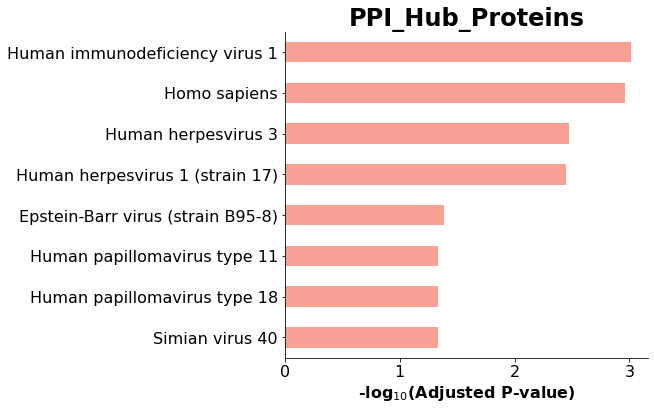

In [54]:
# simple plotting function
from gseapy.plot import barplot, dotplot

# to save your figure, make sure that ``ofname`` is not None
barplot(enr.res2d,title='PPI_Hub_Proteins',)

<AxesSubplot:title={'center':'Transcription_Factor_PPIs'}, xlabel='-log$_{10}$(Adjusted P-value)'>

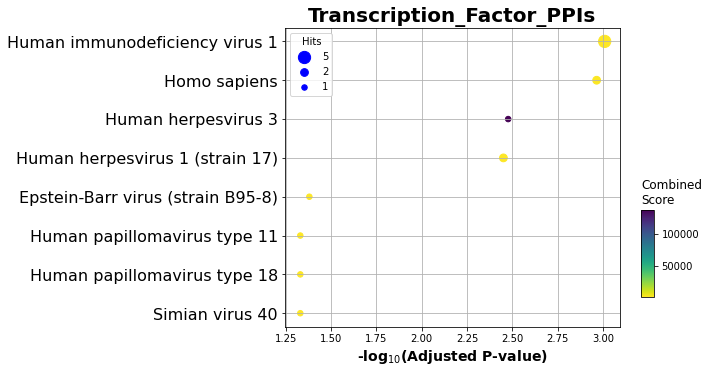

In [55]:
dotplot(enr.res2d, title='Transcription_Factor_PPIs',cmap='viridis_r')

# Dot plot

In [61]:
# df['wk-shell']
x = []
y = []
size = []
text = []
groups = []

for c in Col_dict:
    # print(c, Col_dict[c])
    # x.append(Col_dict[c])
    I = list(df[c].index)
    for i in I:
        y.append(i)
        x.append(c) #Col_dict[c]
        E = 'NE'
        if i in Encrihment_dict:
            # print(i, Encrihment_dict[i])
            E = Encrihment_dict[i]
        groups.append(E)
        
    for s in df[c].values:
        size.append(s)
        text.append("<br>".join([str(round(s, 2)), c]))

    
Dot_plot_df = pd.DataFrame({"Centrality":x,
                           "Protein":y,
                           "Value":size,
                           "Info":text,
                           "Encrichment":groups})
Dot_plot_df.head(25)

,Centrality,Protein,Value,Info,Encrichment
0,BetweennessCentrality,HNRNPH1,1.000000,1.0<br>BetweennessCentrality,NE
1,BetweennessCentrality,YWHAG,0.430560,0.43<br>BetweennessCentrality,NE
2,BetweennessCentrality,BAG2,0.176601,0.18<br>BetweennessCentrality,Homo sapiens
3,BetweennessCentrality,C1QBP,0.202625,0.2<br>BetweennessCentrality,Human immunodeficiency virus 1
4,BetweennessCentrality,PCNA,0.134775,0.13<br>BetweennessCentrality,Human herpesvirus 1 (strain 17)
5,BetweennessCentrality,CIT,0.166885,0.17<br>BetweennessCentrality,NE
6,BetweennessCentrality,PHB2,0.030303,0.03<br>BetweennessCentrality,NE
7,BetweennessCentrality,CCT7,0.013456,0.01<br>BetweennessCentrality,NE
8,BetweennessCentrality,TUBA4A,0.078775,0.08<br>BetweennessCentrality,Human immunodeficiency virus 1
9,BetweennessCentrality,CCT4,0.021924,0.02<br>BetweennessCentrality,Human immunodeficiency virus 1


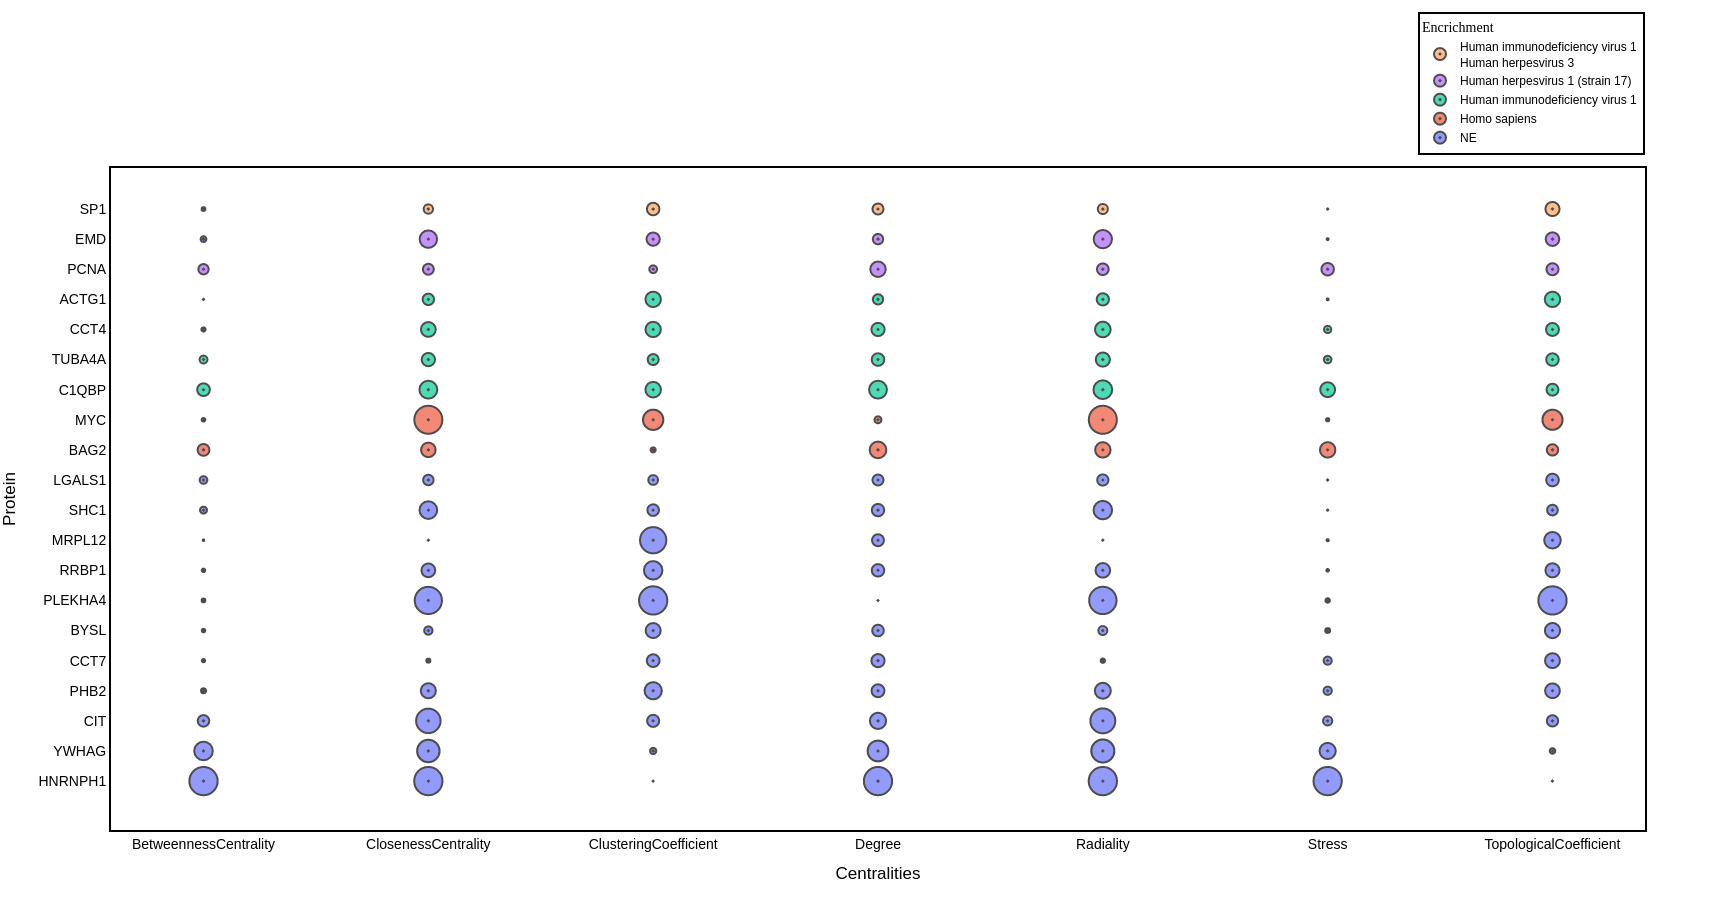

In [62]:
import plotly.express as px

# Make Scaterplot
fig = px.scatter(
    Dot_plot_df, 
    x="Centrality", 
    y="Protein", 
    size="Value", 
    color="Encrichment", hover_data=['Info']
)

# Symbol and circle rim
fig.update_traces(mode='markers', marker_symbol = 200, marker_line_width=2, marker_line_color='rgba(0, 0, 0, 1)')
# Add boundaries                      
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

    
# Size of the plot   
fig.update_layout(
    title=None,
    autosize=False,
    width=420,
    height=910,
    # paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        title="Centralities"
    ),
    yaxis=dict(
        title="Protein"
    ),
    font=dict(
        family="Arial",
        size=14,
        color="black"
    )
)
    

# Update legend
fig.update_layout(
    legend=dict(
        orientation="v",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Arial",
            size=12,
            color="black"
        ),
        bgcolor="rgba(0,0,0,0)",
        bordercolor="Black",
        borderwidth=2
    )
)


fig_dots = fig

fig_dots

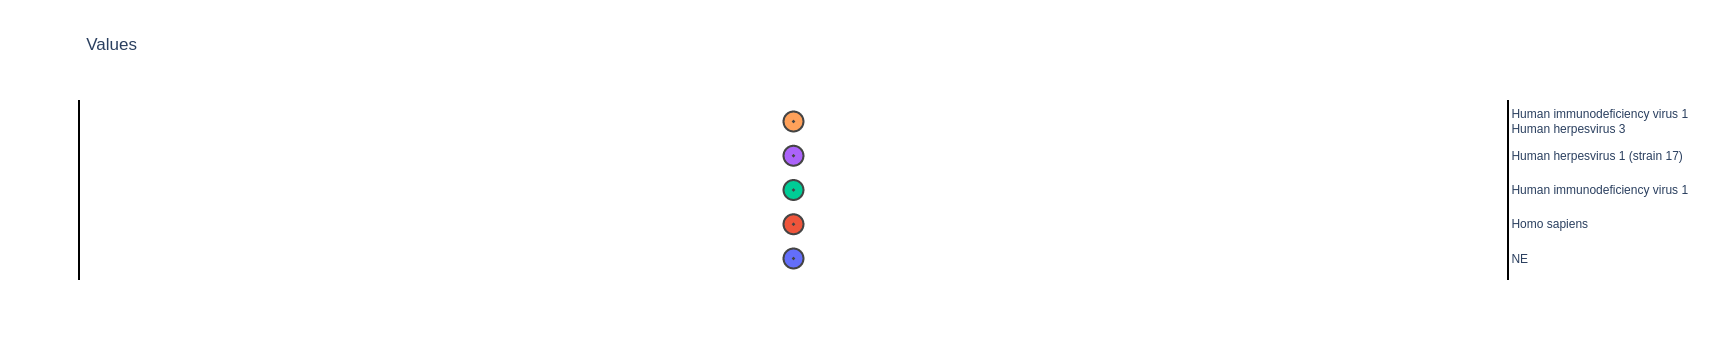

In [63]:
x = []
y = []
colors = []

for i in range(len(fig_dots['data'])):
    # print(i)
    legendgroup = fig_dots['data'][i]['legendgroup']
    color = fig_dots['data'][i]['marker']['color']
    # print(legendgroup, color)
    x.append('')
    y.append(legendgroup)
    colors.append(color)

# fig = px.scatter(x=x, y=y, color=colors)

import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(color=colors, 
                # size=[40, 60, 80, 100]
               )
))

# fig.show()

fig.update_traces(
    mode='markers'
                  , marker_symbol = 200, 
                  marker_line_width=2, 
                  # marker_line_color='rgba(0, 0, 0, 1)'
                 )

# fig.update_traces(marker=dict(color='lightgray'))

fig.update_xaxes(visible=False)
fig.update_yaxes(ticklabelposition="outside right", side= 'right')
fig.update_yaxes(tick0=0, dtick=0.25)


fig.update_layout(showlegend=False)
fig.update_traces(marker_size=20)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)


fig.update_layout(
    title=f'Values',
    autosize=False,
    width=200,
    height=290,
    # paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        title="Centralities"
    ),
    yaxis=dict(
        title=""
    )
    )

fig_legend = fig
fig_legend

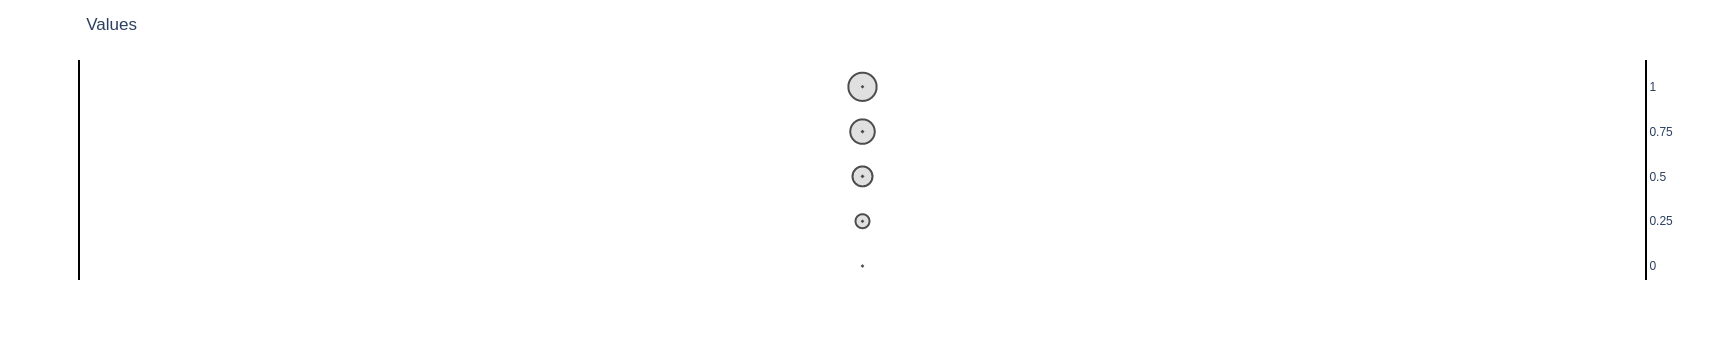

In [64]:
fig = px.scatter(x=['', '', '', '', ''], y=[0, 0.25, 0.5, 0.75, 1], size = [0, .25, .50, .75, 1])

fig.update_traces(
    mode='markers'
                  , marker_symbol = 200, 
                  marker_line_width=2, 
                  marker_line_color='rgba(0, 0, 0, 1)'
                 )

fig.update_traces(marker=dict(color='lightgray'))

fig.update_xaxes(visible=False)
fig.update_yaxes(ticklabelposition="outside right", side= 'right')
fig.update_yaxes(tick0=0, dtick=0.25)
fig.update_xaxes(tick0=0, dtick=0)




fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)


fig.update_layout(
    title=f'Values',
    autosize=False,
    width=200,
    height=290,
    # paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        title="Centralities"
    ),
    yaxis=dict(
        title=""
    )
    )


fig_radius = fig
fig_radius

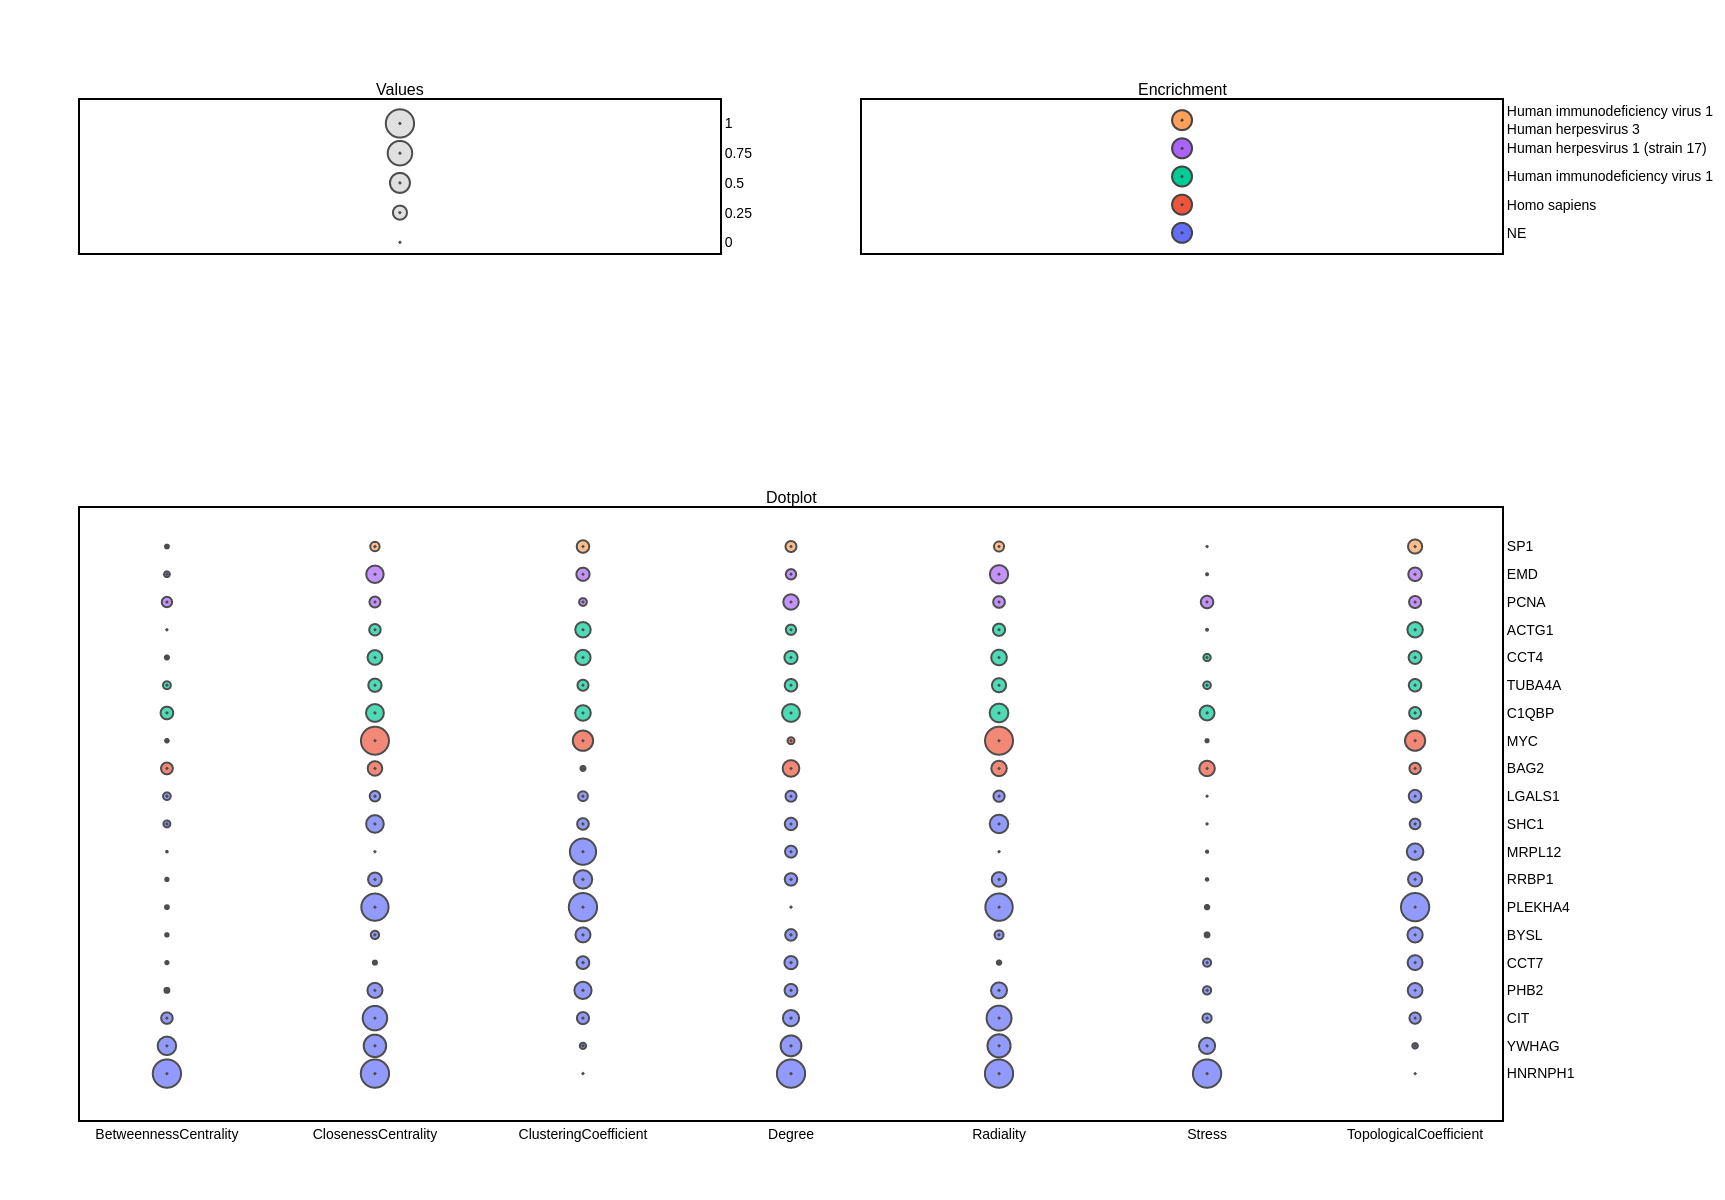

In [65]:
import plotly.express as px
import plotly.subplots as sp

# Create figures in Express
figure1 = fig_dots
figure2 = fig_radius
figure3 = fig_legend

# For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
# This is essentially breaking down the Express fig into it's traces
figure1_traces = []
figure2_traces = []
figure3_traces = []

for trace in range(len(figure1["data"])):
    figure1_traces.append(figure1["data"][trace])
for trace in range(len(figure2["data"])):
    figure2_traces.append(figure2["data"][trace])
for trace in range(len(figure3["data"])):
    figure3_traces.append(figure3["data"][trace])

#Create a 1x2 subplot
# fig = sp.make_subplots(rows=2, cols=1, row_heights=[0.9, 0.1]) 

fig = sp.make_subplots(
    rows=2, cols=2, row_heights=[.2,.8],
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Values","Encrichment", "Dotplot"))




# Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot
for traces in figure1_traces:
    fig.append_trace(traces, row=2, col=1)
for traces in figure2_traces:
    fig.append_trace(traces, row=1, col=1)
for traces in figure3_traces:
    fig.append_trace(traces, row=1, col=2)

    
# Size of the plot   
fig.update_layout(
    title=None,
    autosize=False,
    width=600,
    height=1200,
    # paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    # xaxis=dict(
    #     title="Centralities"
    # ),
    # yaxis=dict(
    #     title="Protein"
    # ),
    font=dict(
        family="Arial",
        size=14,
        color="black"
    )
)
    
    
# # Update legend
# fig.update_layout(
#     legend=dict(
#         orientation="h",
#     yanchor="bottom",
#     y=1.02,
#     xanchor="right",
#     x=1,
#         traceorder="reversed",
#         title_font_family="Times New Roman",
#         font=dict(
#             family="Arial",
#             size=12,
#             color="black"
#         ),
#         bgcolor="rgba(0,0,0,0)",
#         bordercolor="Black",
#         borderwidth=2
#     )
# )

fig.update_layout(showlegend=False)
fig.update_yaxes(tick0=0, dtick=0.25)
# fig.update_xaxes(tick0=0, dtick=10)
# fig.update_xaxes(visible=False)
fig.update_yaxes(ticklabelposition="outside right", side= 'right')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

    
#the subplot as shown in the above image
fig